# 라이브러리 불러오기

In [1]:
import os
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# 랜덤 시드 설정

In [2]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# 데이터 불러오기

In [26]:
train_data = pd.read_csv('train.csv')

subway_data = pd.read_csv('subwayInfo.csv')
school_data = pd.read_csv('schoolinfo.csv')
park_data = pd.read_csv('parkInfo.csv')


### 같은 위치, 같은 너비, 같은 금리 묶어보기

#### 결측치 확인

In [ ]:
for df in df_list:
    print(f"{df.isnull().sum()}\n")

index                  0
area_m2                0
contract_year_month    0
contract_day           0
contract_type          0
floor                  0
built_year             0
latitude               0
longitude              0
age                    0
deposit                0
dtype: int64

latitude     0
longitude    0
area         0
dtype: int64

schoolLevel    0
latitude       0
longitude      0
dtype: int64

latitude     0
longitude    0
dtype: int64

year_month       0
interest_rate    0
dtype: int64



In [ ]:
# train_data = train_data.drop(columns=['contract_day','contract_type','built_year'])

In [ ]:
train_data

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit
0,0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,17000.0
1,1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,23000.0
2,2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,23000.0
3,3,59.3400,201907,15,2,1,1986,36.964647,127.055847,33,5000.0
4,4,59.8100,201904,12,2,6,1995,36.972390,127.084514,24,1800.0
...,...,...,...,...,...,...,...,...,...,...,...
1801223,1801223,114.8126,202311,25,0,5,2010,37.528394,126.659398,13,39000.0
1801224,1801224,101.9088,202311,28,0,6,2010,37.528394,126.659398,13,38000.0
1801225,1801225,114.7900,202312,3,0,19,2010,37.528394,126.659398,13,37000.0
1801226,1801226,101.9088,202312,4,1,15,2010,37.528394,126.659398,13,34400.0


In [ ]:
train_data.describe()

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit
count,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06,1.801228e+06
mean,9.006135e+05,7.518833e+01,2.021331e+05,1.589943e+01,1.203805e+00,1.005197e+01,2.004199e+03,3.747721e+01,1.269662e+02,1.706597e+01,3.816223e+04
std,5.199699e+05,2.552632e+01,1.352815e+02,8.625998e+00,8.852792e-01,6.973359e+00,1.115132e+01,1.625113e-01,1.701221e-01,1.112796e+01,2.610377e+04
min,0.000000e+00,1.032150e+01,2.019040e+05,1.000000e+00,0.000000e+00,-4.000000e+00,1.961000e+03,3.691791e+01,1.264787e+02,-3.000000e+00,3.000000e+02
25%,4.503068e+05,5.975000e+01,2.020080e+05,9.000000e+00,0.000000e+00,5.000000e+00,1.995000e+03,3.737976e+01,1.268422e+02,7.000000e+00,2.100000e+04
50%,9.006135e+05,7.715000e+01,2.021110e+05,1.600000e+01,2.000000e+00,9.000000e+00,2.004000e+03,3.750227e+01,1.269976e+02,1.700000e+01,3.200000e+04
75%,1.350920e+06,8.496000e+01,2.022120e+05,2.300000e+01,2.000000e+00,1.400000e+01,2.015000e+03,3.758205e+01,1.270888e+02,2.600000e+01,4.780000e+04
max,1.801227e+06,3.173600e+02,2.023120e+05,3.100000e+01,2.000000e+00,6.800000e+01,2.024000e+03,3.818194e+01,1.276609e+02,6.200000e+01,1.100000e+06


#### 금리랑 가격 확인해보기

In [ ]:
dic = {}
inter_df = interest_data.set_index('year_month').T.to_dict('list')
# inter = train_data["contract_year_month"]

new_df = pd.DataFrame(train_data["contract_year_month"].map(inter_df))
new_df.rename(columns={"contract_year_month" : "inter"},inplace=True)
train_data = pd.concat([train_data,new_df],axis=1)



In [ ]:
new_df

,inter
0,[1.78]
1,[1.26]
2,[1.26]
3,[1.68]
4,[1.85]
...,...
1801223,[4.0]
1801224,[4.0]
1801225,[3.84]
1801226,[3.84]


In [ ]:
train_data['inter'] = train_data['inter'].apply(lambda x: x[0] if isinstance(x, list) else x)

In [ ]:
train_data


,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,inter
0,0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,17000.0,1.78
1,1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,23000.0,1.26
2,2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,23000.0,1.26
3,3,59.3400,201907,15,2,1,1986,36.964647,127.055847,33,5000.0,1.68
4,4,59.8100,201904,12,2,6,1995,36.972390,127.084514,24,1800.0,1.85
...,...,...,...,...,...,...,...,...,...,...,...,...
1801223,1801223,114.8126,202311,25,0,5,2010,37.528394,126.659398,13,39000.0,4.00
1801224,1801224,101.9088,202311,28,0,6,2010,37.528394,126.659398,13,38000.0,4.00
1801225,1801225,114.7900,202312,3,0,19,2010,37.528394,126.659398,13,37000.0,3.84
1801226,1801226,101.9088,202312,4,1,15,2010,37.528394,126.659398,13,34400.0,3.84


#### 데이터 하나로 합쳐보기

In [ ]:
cols=['area_m2','contract_year_month','floor','latitude','longitude','age']
train_data['combo'] = train_data[cols].astype(str).agg('_'.join,axis=1)
train_data['combo'].astype('category')
train_data.drop(columns=cols,inplace=True)
train_data

In [ ]:
### 중복값 제거
train_data = train_data.drop_duplicates(subset=['combo','deposit'])
train_data

,index,contract_day,contract_type,built_year,deposit,inter,combo
0,0,25,2,2019,17000.0,1.78,84.9981_201906_9_37.054314_127.0452164_0
1,1,26,2,2019,23000.0,1.26,84.9981_202003_20_37.054314_127.0452164_1
2,2,28,2,2019,23000.0,1.26,84.9981_202003_8_37.054314_127.0452164_1
3,3,15,2,1986,5000.0,1.68,59.34_201907_1_36.964647_127.0558472_33
4,4,12,2,1995,1800.0,1.85,59.81_201904_6_36.9723899_127.0845143_24
...,...,...,...,...,...,...,...
1801223,1801223,25,0,2010,39000.0,4.00,114.8126_202311_5_37.5283944_126.6593984_13
1801224,1801224,28,0,2010,38000.0,4.00,101.9088_202311_6_37.5283944_126.6593984_13
1801225,1801225,3,0,2010,37000.0,3.84,114.79_202312_19_37.5283944_126.6593984_13
1801226,1801226,4,1,2010,34400.0,3.84,101.9088_202312_15_37.5283944_126.6593984_13


면적, 계약일, 층수, 위경도, 계약 유형이 같은 경우에 가격이 다른 경우를 확인<br>
이러한 데이터의 개수와 양상을 파악하기

In [ ]:
combo_df = pd.DataFrame(train_data.groupby('combo').agg('count')['deposit'])
combo_df = combo_df[combo_df['deposit']>=2]
combo_df

,deposit
combo,
10.92_202107_7_37.5453611_126.8463672_9,2
10.92_202110_4_37.5453611_126.8463672_9,2
100.03_202112_1_37.3060249_126.8511509_22,2
100.0633_201912_12_36.9975316_127.1426227_9,2
100.088_202007_3_37.3292668_127.0744468_15,2
...,...
99.98_202209_1_37.741006_127.0976601_23,2
99.9941_202212_25_37.4108669_126.9890872_0,2
99.9_201912_2_37.3265323_127.0884968_25,2


In [ ]:
cost_df = train_data.groupby('combo').agg(
    deposit_count=('deposit', 'count'),
    min_price=('deposit', 'min'),
    max_price=('deposit', 'max'),
)

# deposit의 개수가 2 이상인 데이터만 필터링
cost_df = cost_df[cost_df['deposit_count'] >= 2]
cost_df = cost_df.assign(mm = lambda x : cost_df['max_price'] - cost_df['min_price'])

cost_df


,deposit_count,min_price,max_price,mm
combo,,,,
10.92_202107_7_37.5453611_126.8463672_9,2,9500.0,10000.0,500.0
10.92_202110_4_37.5453611_126.8463672_9,2,8400.0,9500.0,1100.0
100.03_202112_1_37.3060249_126.8511509_22,2,30500.0,41000.0,10500.0
100.0633_201912_12_36.9975316_127.1426227_9,2,17000.0,18000.0,1000.0
100.088_202007_3_37.3292668_127.0744468_15,2,42000.0,43000.0,1000.0
...,...,...,...,...
99.98_202209_1_37.741006_127.0976601_23,2,27000.0,28000.0,1000.0
99.9941_202212_25_37.4108669_126.9890872_0,2,50000.0,58000.0,8000.0
99.9_201912_2_37.3265323_127.0884968_25,2,35000.0,36000.0,1000.0


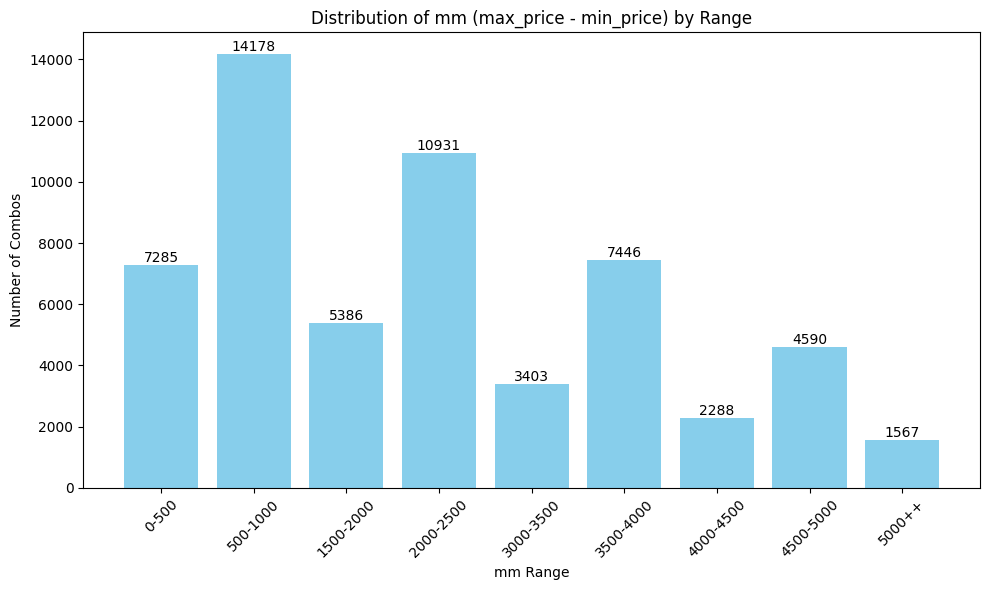

In [ ]:
import matplotlib.pyplot as plt


# Step 2: mm 값을 구간으로 나누기 (bins는 원하는 구간 수로 조정 가능)
bins = [i for i in range(0,5000,500)]  # 예시 구간 (수정 가능)
labels = ['0-500', '500-1000', '1500-2000', '2000-2500', '3000-3500', '3500-4000', '4000-4500','4500-5000','5000++']

cost_df['mm_bin'] = pd.cut(cost_df['mm'], bins=bins, labels=labels)

# Step 3: 각 구간별 개수 세기
mm_bin_counts = cost_df['mm_bin'].value_counts().sort_index()



# Step 4: 시각화 (막대그래프)
plt.figure(figsize=(10, 6))
bars = plt.bar(mm_bin_counts.index, mm_bin_counts.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()  # 막대의 높이 (개수)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')  # 텍스트를 막대 위에 표시

plt.title('Distribution of mm (max_price - min_price) by Range')
plt.xlabel('mm Range')
plt.ylabel('Number of Combos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


같은 금리, 같은 위치, 같은 면적이어도 가격 차이가 남 => 0 - 1000만원까지는 그럴 수 있다고 생각
<br>
그 이상 차이나는 건 단순히 동 차이로 설명이 가능한가?...

In [ ]:
# #라벨 인코딩을 이용하여 보기 편하도록 변환
# train_data['label'] = LabelEncoder().fit_transform(train_data['combo'])
# train_data.drop(columns='combo',inplace=True)
# train_data = train_data.sort_values(by="label")

In [ ]:
# train_data

,index,contract_day,contract_type,built_year,deposit,inter,label
1072364,1072364,24,2,2017,10500.0,1.85,0
1072852,1072852,10,2,2017,10500.0,1.54,1
1135797,1135797,28,2,2017,11550.0,0.80,2
1280958,1280958,2,1,2017,13650.0,1.72,3
1414531,1414531,18,0,2017,11500.0,1.84,4
...,...,...,...,...,...,...,...
917211,917211,28,1,1994,37480.0,4.00,1500269
917213,917213,17,0,1994,53000.0,3.84,1500270
937748,937748,14,0,2023,57000.0,3.84,1500271
937760,937760,30,0,2023,55000.0,3.84,1500272


### 주위 지하철 넣기

In [27]:
### 아파트 위도 경도를 분리하여 중복된 값 제거

loc_df = train_data[['latitude','longitude']]
loc_df = loc_df.drop_duplicates().reset_index(drop=True)
loc_df

,latitude,longitude
0,37.054314,127.045216
1,36.964647,127.055847
2,36.972390,127.084514
3,36.965423,127.048779
4,36.957089,127.047449
...,...,...
18486,37.612604,126.657868
18487,37.584117,126.716550
18488,37.582593,126.716193
18489,37.581261,126.706269


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
add_500m_data = pd.read_csv('500m.csv')
add_1km_data = pd.read_csv('1km.csv')

In [38]:
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree


subway_df = pd.DataFrame(subway_data)

# 위도와 경도를 라디안으로 변환하는 함수
def to_radians(df):
    df['latitude_radians'] = np.deg2rad(df['latitude'])
    df['longitude_radians'] = np.deg2rad(df['longitude'])
    return df

# 아파트와 지하철 데이터를 라디안으로 변환
loc_df = to_radians(loc_df)
subway_df = to_radians(subway_df)
# BallTree에 사용할 지하철역의 좌표 (라디안 값 사용)
subway_coords = subway_df[['latitude_radians', 'longitude_radians']].values
tree = BallTree(subway_coords, metric='haversine')

# 지구 반지름(6371km)을 곱하여 500m 이내의 지하철역 검색
radius_in_km = 0.5  # 500m는 0.5km

# 각 아파트에 대해 500m 이내의 지하철역 개수 계산
apartment_coords = loc_df[['latitude_radians', 'longitude_radians']].values
counts = []
for coord in apartment_coords:
    # 500m 이내의 지하철역 개수 찾기
    indices = tree.query_radius([coord], r=radius_in_km / 6371)
    counts.append(len(indices[0]))  # 해당 아파트에서 500m 이내의 지하철역 개수

# 결과를 DataFrame에 추가
loc_df['subway_count_500m'] = counts

# 최종 결과 CSV로 저장
loc_df.to_csv('500m.csv', index=False)

loc_df['subway_count_500m'].value_counts()

,count
subway_count_500m,
0,11794
1,4900
2,1477
3,213
4,76
5,27
6,2
7,2


In [3]:
#결측치 확인
print(add_500m_data.isna().sum())
print(add_1km_data.isna().sum())

latitude             0
longitude            0
latitude_radians     0
longitude_radians    0
subway_count_500m    0
dtype: int64
latitude             0
longitude            0
latitude_radians     0
longitude_radians    0
subway_count_1km     0
dtype: int64


In [4]:
#위,경도를 기준으로 n거리만큼 count를 dict형태로 매칭

transform = dict(zip(zip(add_500m_data['latitude'],add_500m_data['longitude']),add_500m_data['subway_count_500m']))
transform_k = dict(zip(zip(add_1km_data['latitude'],add_1km_data['longitude']),add_1km_data['subway_count_1km']))


transform

{(37.054314, 127.0452164): 0,
 (36.964647, 127.0558472): 0,
 (36.9723899, 127.0845143): 0,
 (36.9654234, 127.0487791): 0,
 (36.9570886, 127.0474487): 0,
 (36.9631054, 127.0406778): 0,
 (36.9637429, 127.0486): 0,
 (36.9618294, 127.055295): 0,
 (36.9600337, 127.0599393): 0,
 (36.9618152, 127.0580424): 0,
 (36.96365, 127.0601166): 0,
 (36.9628346, 127.0541719): 0,
 (36.9884117, 126.9241276): 0,
 (36.9878363, 126.921848): 0,
 (36.9934581, 126.9524814): 0,
 (36.9770632, 126.9286049): 0,
 (36.9810469, 126.9380163): 0,
 (36.9756891, 126.9279402): 0,
 (36.9785586, 126.9294733): 0,
 (36.985643, 126.918): 0,
 (36.9877789, 126.9198407): 0,
 (36.9805359, 126.9175353): 0,
 (36.9839209, 126.9178738): 0,
 (36.9808646, 126.9226211): 0,
 (36.9794727, 126.9243506): 0,
 (36.9879068, 126.9181486): 0,
 (36.9834419, 126.9203375): 0,
 (36.9822403, 126.9176297): 0,
 (36.9840289, 126.9164238): 0,
 (36.9837576, 126.9188539): 0,
 (36.9806674, 126.925361): 0,
 (36.9822864, 126.9260333): 0,
 (36.9868248, 126.91807

In [5]:
#위도와 경도를 이용하여 새로운 컬럼을 추가

subway_add = train_data.copy()
subway_add['count'] = subway_add.apply(lambda row: transform.get((row['latitude'], row['longitude']), None), axis=1)
test_data['count'] = subway_add.apply(lambda row: transform.get((row['latitude'], row['longitude']), None), axis=1)
subway_add['count_k'] = subway_add.apply(lambda row: transform_k.get((row['latitude'], row['longitude']), None), axis=1)
test_data['count_k'] = subway_add.apply(lambda row: transform_k.get((row['latitude'], row['longitude']), None), axis=1)


In [6]:
print(subway_add['count'].value_counts())
print(subway_add['count_k'].value_counts())

count
0    1230430
1     433455
2     105607
3      18625
4       6038
5       1238
7        132
6        110
Name: count, dtype: int64
count_k
0     657479
1     451859
2     309555
3     159954
4      96111
5      50073
6      30507
7      20052
8      15263
9       2704
11       972
10       904
12        82
14        71
13        49
Name: count, dtype: int64


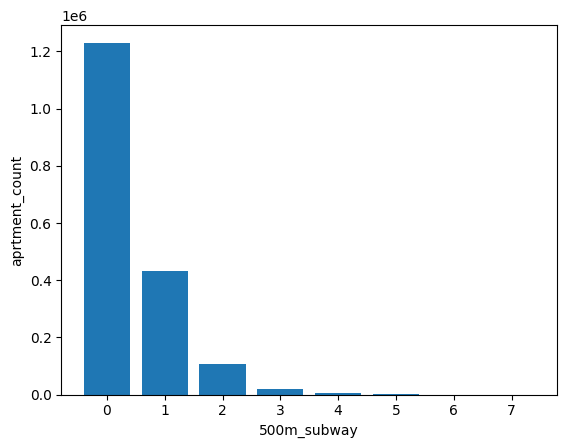

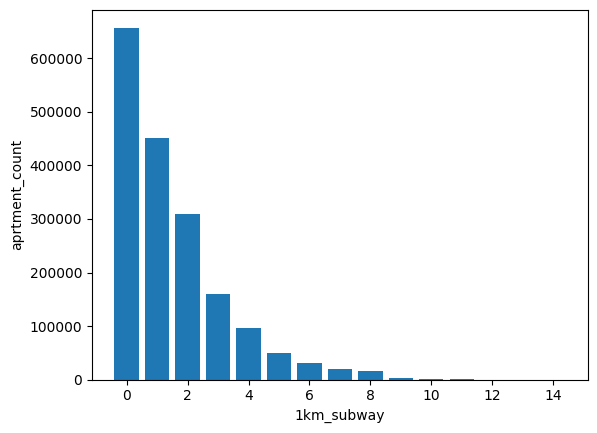

In [7]:
###아파트 주변의 역 개수 분포

import matplotlib.pyplot as plt

value_sort = subway_add['count'].value_counts().sort_index()
deposit_num = train_data['deposit'].sort_values()

plt.bar(value_sort.index,value_sort.values)
plt.xlabel("500m_subway")
plt.ylabel('aprtment_count')
plt.show()

value_sort_k = subway_add['count_k'].value_counts().sort_index()

plt.bar(value_sort_k.index,value_sort_k.values)
plt.xlabel("1km_subway")
plt.ylabel('aprtment_count')
plt.show()




In [8]:
subway_add = subway_add.drop(columns=['index','contract_day'])
subway_add.corr()

,area_m2,contract_year_month,contract_type,floor,built_year,latitude,longitude,age,deposit,count,count_k
area_m2,1.000000,-0.009493,0.007078,0.103953,0.081970,-0.005395,0.030034,-0.083317,0.522466,-0.050599,-0.040518
contract_year_month,-0.009493,1.000000,-0.644486,0.021444,0.075927,-0.021786,0.015419,0.045692,0.075258,-0.018215,-0.021715
contract_type,0.007078,-0.644486,1.000000,-0.019489,-0.070984,0.017470,-0.004180,-0.006966,-0.087177,0.014457,0.021635
floor,0.103953,0.021444,-0.019489,1.000000,0.289575,-0.032810,-0.037735,-0.287509,0.132577,0.005307,-0.024160
built_year,0.081970,0.075927,-0.070984,0.289575,1.000000,-0.081068,0.012893,-0.992598,0.145590,-0.104905,-0.146671
latitude,-0.005395,-0.021786,0.017470,-0.032810,-0.081068,1.000000,-0.145888,0.078573,0.076425,0.159192,0.247758
longitude,0.030034,0.015419,-0.004180,-0.037735,0.012893,-0.145888,1.000000,-0.011062,0.155889,0.037014,0.040521
age,-0.083317,0.045692,-0.006966,-0.287509,-0.992598,0.078573,-0.011062,1.000000,-0.136846,0.102870,0.144280
deposit,0.522466,0.075258,-0.087177,0.132577,0.145590,0.076425,0.155889,-0.136846,1.000000,0.216560,0.321931
count,-0.050599,-0.018215,0.014457,0.005307,-0.104905,0.159192,0.037014,0.102870,0.216560,1.000000,0.559535


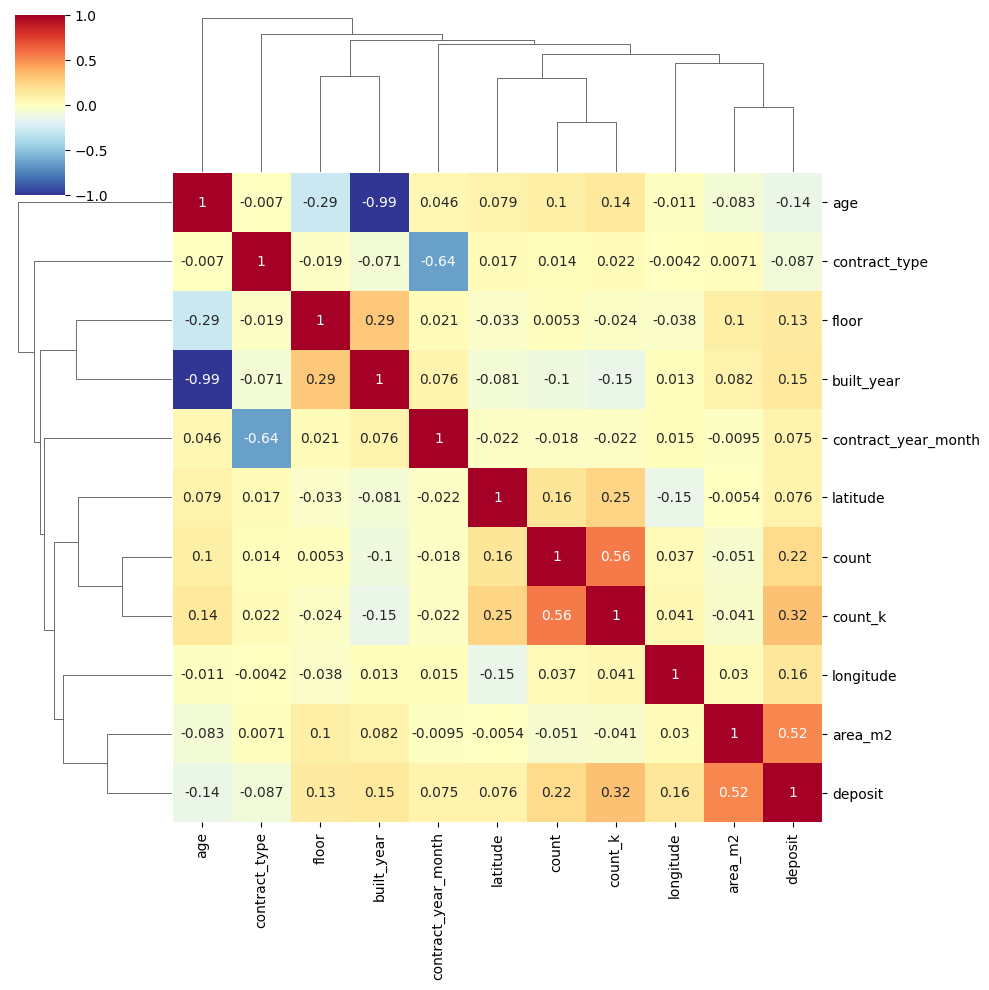

In [9]:
###feature별 연관관계 확인
sns.clustermap(subway_add.corr(),
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

모델 학습 후 feature 중요도 출력

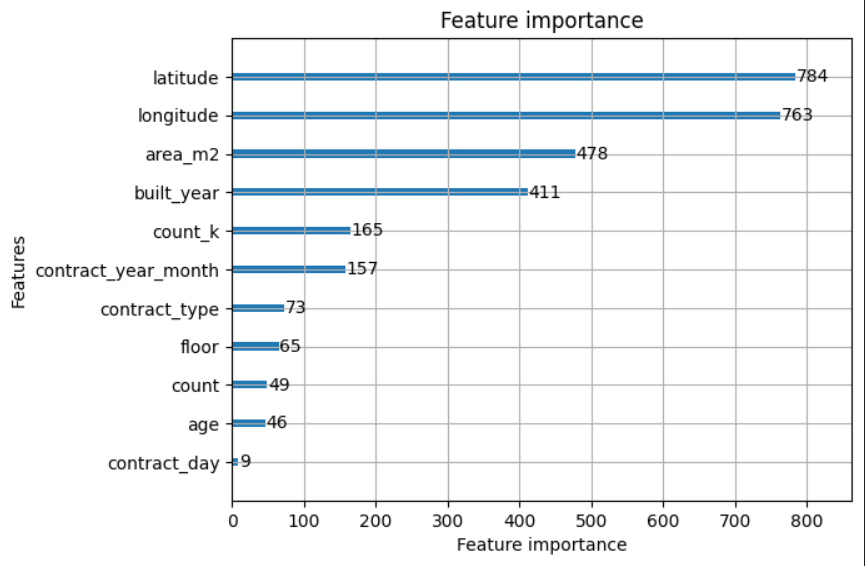

<h3> 지하철 역의 개수가 corr()에서 500m는 0.22, 1km는 0.32로 높은 연관관계를 가짐. 1km가 더 높은 이유는 아마 0이 더 없어서 그런가?

### 주변 학교데이터 넣기

In [10]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
elementary_500m = pd.read_csv('elementary_0.5km.csv')
elementary_1km = pd.read_csv('elementary_1km.csv')
middle_500m = pd.read_csv('middle_0.5km.csv')
middle_1km = pd.read_csv('middle_1km.csv')
high_500m = pd.read_csv('high_0.5km.csv')
high_1km = pd.read_csv('high_1km.csv')

In [61]:
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree

def school_filler(data,category):
    print(category)
    if category == 'all':
        pass
    elif category =='elementary':
        tem = data[data['schoolLevel']=='elementary'].index
        data = data.loc[data['schoolLevel']=='elementary',['latitude','longitude']]
        return data
    elif category == 'middle':
        tem = data[data['schoolLevel']=='middle'].index
        data = data.loc[data['schoolLevel']=='middle',['latitude','longitude']]
        return data
    elif category == 'high':
        tem = data[data['schoolLevel']=='high'].index
        data = data.loc[data['schoolLevel']=='high',['latitude','longitude']]
        return data

category = 'high'
# school_list =['elementary','middle','high']

school_data = school_filler(school_data,category)
# print(school_data)
school_df = pd.DataFrame(school_data)


# 위도와 경도를 라디안으로 변환하는 함수
def to_radians(df):
    df['latitude_radians'] = np.deg2rad(df['latitude'])
    df['longitude_radians'] = np.deg2rad(df['longitude'])
    return df

# 아파트와 지하철 데이터를 라디안으로 변환
loc_df = to_radians(loc_df)
school_df = to_radians(school_df)
# BallTree에 사용할 지하철역의 좌표 (라디안 값 사용)
school_coords = school_df[['latitude_radians', 'longitude_radians']].values
tree = BallTree(school_coords, metric='haversine')

# 지구 반지름(6371km)을 곱하여 500m 이내의 지하철역 검색
radius_in_km = 1  # 500m는 0.5km

# 각 아파트에 대해 500m 이내의 지하철역 개수 계산
apartment_coords = loc_df[['latitude_radians', 'longitude_radians']].values
counts = []
for coord in apartment_coords:
    # 500m 이내의 지하철역 개수 찾기
    indices = tree.query_radius([coord], r=radius_in_km / 6371)
    counts.append(len(indices[0]))  # 해당 아파트에서 500m 이내의 지하철역 개수


# 각 건물에 대해 1km 반경 내 지하철역 개수를 계산하여 새로운 열 'subway_count'에 저장
loc_df[f'school_{category}_{radius_in_km}km'] = counts

# 최종 결과 CSV로 저장
loc_df.to_csv(f'{category}_{radius_in_km}km.csv', index=False)

loc_df[f'school_{category}_{radius_in_km}km'].value_counts()

high


,count
school_high_1km,
1,5729
2,4510
0,3973
3,2163
4,1113
5,545
6,199
7,128
8,104


In [11]:
#결측치 확인
print(elementary_500m.isna().sum())
print(elementary_1km.isna().sum())
print(middle_500m.isna().sum())
print(middle_1km.isna().sum())
print(high_500m.isna().sum())
print(high_1km.isna().sum())

latitude                   0
longitude                  0
latitude_radians           0
longitude_radians          0
school_elementary_0.5km    0
dtype: int64
latitude                   0
longitude                  0
latitude_radians           0
longitude_radians          0
school_elementary_0.5km    0
school_elementary_1km      0
dtype: int64
latitude                   0
longitude                  0
latitude_radians           0
longitude_radians          0
school_elementary_0.5km    0
school_elementary_1km      0
school_middle_0.5km        0
dtype: int64
latitude                   0
longitude                  0
latitude_radians           0
longitude_radians          0
school_elementary_0.5km    0
school_elementary_1km      0
school_middle_0.5km        0
school_middle_1km          0
dtype: int64
latitude                   0
longitude                  0
latitude_radians           0
longitude_radians          0
school_elementary_0.5km    0
school_elementary_1km      0
school_middle_0.5km 

In [12]:
#위,경도를 기준으로 n거리만큼 count를 dict형태로 매칭

elementary_count_500m= dict(zip(zip(elementary_500m['latitude'],elementary_500m['longitude']),elementary_500m['school_elementary_0.5km']))
elementary_count_1km= dict(zip(zip(elementary_1km['latitude'],elementary_1km['longitude']),elementary_1km['school_elementary_1km']))
middle_count_500m= dict(zip(zip(middle_500m['latitude'],middle_500m['longitude']),middle_500m['school_middle_0.5km']))
middle_count_1km= dict(zip(zip(middle_1km['latitude'],middle_1km['longitude']),middle_1km['school_middle_1km']))
high_count_500m= dict(zip(zip(high_500m['latitude'],high_500m['longitude']),high_500m['school_high_0.5km']))
high_count_1km= dict(zip(zip(high_1km['latitude'],high_1km['longitude']),high_1km['school_high_1km']))

In [13]:
#위도와 경도를 이용하여 새로운 컬럼을 추가

school_add = train_data.copy()
school_add['elementary_count_500m'] = school_add.apply(lambda row: elementary_count_500m.get((row['latitude'], row['longitude']), None), axis=1)
school_add['elementary_count_1km'] = school_add.apply(lambda row: elementary_count_1km.get((row['latitude'], row['longitude']), None), axis=1)
school_add['middle_count_500m'] = school_add.apply(lambda row: middle_count_500m.get((row['latitude'], row['longitude']), None), axis=1)
school_add['middle_count_1km'] = school_add.apply(lambda row: middle_count_1km.get((row['latitude'], row['longitude']), None), axis=1)
school_add['high_count_500m'] = school_add.apply(lambda row: high_count_500m.get((row['latitude'], row['longitude']), None), axis=1)
school_add['high_count_1km'] = school_add.apply(lambda row: high_count_1km.get((row['latitude'], row['longitude']), None), axis=1)

test_data['elementary_count_500m'] = school_add.apply(lambda row: elementary_count_500m.get((row['latitude'], row['longitude']), None), axis=1)
test_data['elementary_count_1km'] = school_add.apply(lambda row: elementary_count_1km.get((row['latitude'], row['longitude']), None), axis=1)
test_data['middle_count_500m'] = school_add.apply(lambda row: middle_count_500m.get((row['latitude'], row['longitude']), None), axis=1)
test_data['middle_count_1km'] = school_add.apply(lambda row: middle_count_1km.get((row['latitude'], row['longitude']), None), axis=1)
test_data['high_count_500m'] = school_add.apply(lambda row: high_count_500m.get((row['latitude'], row['longitude']), None), axis=1)
test_data['high_count_1km'] = school_add.apply(lambda row: high_count_1km.get((row['latitude'], row['longitude']), None), axis=1)


In [14]:
school_add

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,elementary_count_500m,elementary_count_1km,middle_count_500m,middle_count_1km,high_count_500m,high_count_1km
0,0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,17000.0,1,1,1,2,0,1
1,1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,23000.0,1,1,1,2,0,1
2,2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,23000.0,1,1,1,2,0,1
3,3,59.3400,201907,15,2,1,1986,36.964647,127.055847,33,5000.0,2,2,0,1,0,1
4,4,59.8100,201904,12,2,6,1995,36.972390,127.084514,24,1800.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801223,1801223,114.8126,202311,25,0,5,2010,37.528394,126.659398,13,39000.0,2,2,1,3,1,2
1801224,1801224,101.9088,202311,28,0,6,2010,37.528394,126.659398,13,38000.0,2,2,1,3,1,2
1801225,1801225,114.7900,202312,3,0,19,2010,37.528394,126.659398,13,37000.0,2,2,1,3,1,2
1801226,1801226,101.9088,202312,4,1,15,2010,37.528394,126.659398,13,34400.0,2,2,1,3,1,2


In [15]:
school_add = school_add.drop(columns=['index','contract_day'])
school_add.corr()

,area_m2,contract_year_month,contract_type,floor,built_year,latitude,longitude,age,deposit,elementary_count_500m,elementary_count_1km,middle_count_500m,middle_count_1km,high_count_500m,high_count_1km
area_m2,1.000000,-0.007991,0.006181,0.104501,0.082884,-0.004836,0.027761,-0.084076,0.521623,-0.050477,-0.125532,-0.012030,-0.063506,-0.022549,-0.045307
contract_year_month,-0.007991,1.000000,-0.644574,0.022374,0.078174,-0.019588,0.008325,0.043558,0.073296,-0.014752,-0.026547,-0.015870,-0.024201,-0.012458,-0.019354
contract_type,0.006181,-0.644574,1.000000,-0.020032,-0.072213,0.016139,0.000007,-0.005817,-0.085880,0.017263,0.022279,0.016734,0.023384,0.016118,0.023572
floor,0.104501,0.022374,-0.020032,1.000000,0.289763,-0.032382,-0.038915,-0.287661,0.132336,-0.026198,-0.060261,-0.043885,-0.066162,-0.056936,-0.071561
built_year,0.082884,0.078174,-0.072213,0.289763,1.000000,-0.079733,0.009425,-0.992584,0.144960,-0.168807,-0.282227,-0.165166,-0.266765,-0.161447,-0.231331
latitude,-0.004836,-0.019588,0.016139,-0.032382,-0.079733,1.000000,-0.147912,0.077519,0.075605,0.060393,0.146564,0.087226,0.159859,0.095181,0.157440
longitude,0.027761,0.008325,0.000007,-0.038915,0.009425,-0.147912,1.000000,-0.008446,0.157374,-0.055553,-0.064396,-0.021370,-0.002906,-0.022129,-0.025409
age,-0.084076,0.043558,-0.005817,-0.287661,-0.992584,0.077519,-0.008446,1.000000,-0.136479,0.167368,0.279593,0.163569,0.264381,0.160243,0.229454
deposit,0.521623,0.073296,-0.085880,0.132336,0.144960,0.075605,0.157374,-0.136479,1.000000,0.007017,0.028412,0.063665,0.105401,0.085821,0.123353
elementary_count_500m,-0.050477,-0.014752,0.017263,-0.026198,-0.168807,0.060393,-0.055553,0.167368,0.007017,1.000000,0.476882,0.274062,0.311448,0.221911,0.262986


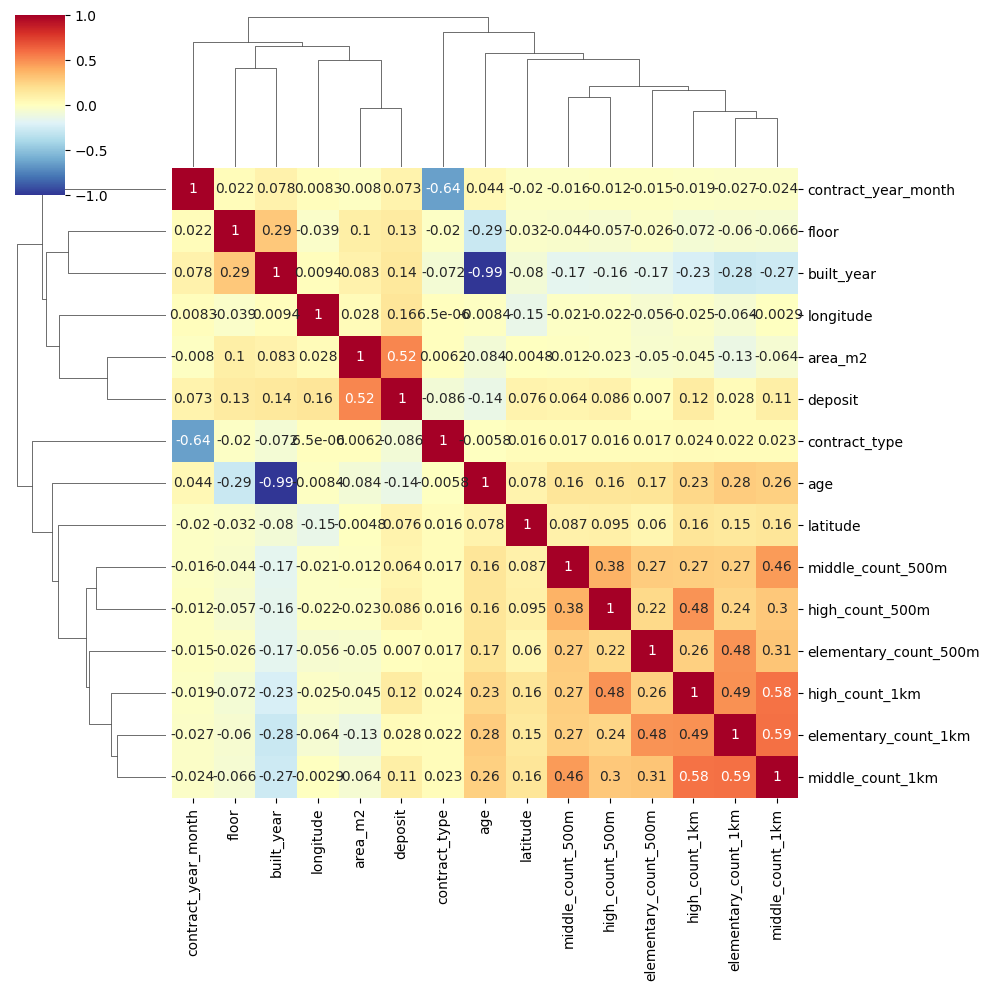

In [16]:
sns.clustermap(school_add.corr(),
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

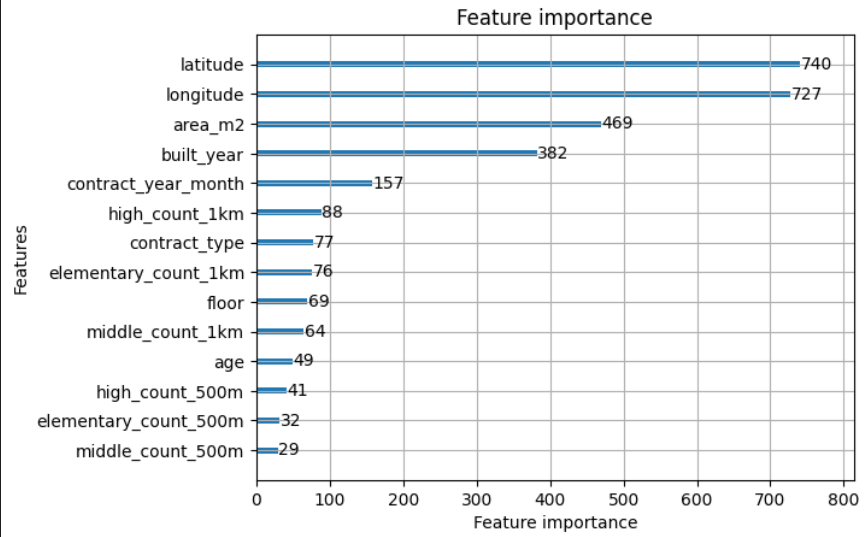

<h3> 여기서도 1km가 더 높은 가중치를 가짐. 또한, corr()에서는 초등학교가 연관성이 적다고 나오는데 너무 들쑥날쑥해서 그런가?...

In [ ]:
loc_df.to_csv('output.csv')

In [ ]:
loc_df

,latitude,longitude,school_count
0,37.054314,127.045216,0.0
1,36.964647,127.055847,1.0
2,36.972390,127.084514,0.0
3,36.965423,127.048779,1.0
4,36.957089,127.047449,1.0
...,...,...,...
18486,37.612604,126.657868,NaN
18487,37.584117,126.716550,NaN
18488,37.582593,126.716193,NaN
18489,37.581261,126.706269,NaN
